<a href="https://colab.research.google.com/github/NaomyChemungor/Statistics_Autumn_2023/blob/main/Statistics_and_Inference_Part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Part One -Question 1
import scipy.stats as stats

# Define the degrees of freedom
v1 = 13
v2 = 32

# Define the critical value
critical_value = 2.34

# Calculate the probability P(W >= 2.34)
probability = 1 - stats.f.cdf(critical_value, v1, v2)

# Print the result
print("P(W >= 2.34) =", probability)


P(W >= 2.34) = 0.025050823972958325


In [2]:
# Part One -Question 2
from scipy.stats import binom

n = 123
p = 0.37
lower_bound = 43
upper_bound = 56

# Initialize the probability to 0
probability = 0

# Sum the probabilities for each value in the specified range
for k in range(lower_bound, upper_bound + 1):
    probability += binom.pmf(k, n, p)

print("P(43 ≤ S ≤ 56) =", probability)


P(43 ≤ S ≤ 56) = 0.6899039942227068


In [4]:
# Part One -Question 3a)
import scipy.integrate as spi
import numpy as np

# Define the joint density function
def joint_density(x, y):
    return (2 * x + 3 * y) * np.log(1 + x**2 + y**2)

# Calculate the normalization constant k
k = 1 / spi.dblquad(joint_density, 0, 1, 0, 1)[0]

print(k)


0.6898682164919088


In [5]:
# Part One -Question 3b)
from scipy.integrate import dblquad
import numpy as np

def integrand(x, y):
    return 0.68988 * (2*x + 3*y) * np.log(1 + x**2 + y**2)

result, _ = dblquad(integrand, 0.5, 1, 0.5, 1)
print(result)


0.5060498925376673


In [7]:
#Importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# Load an Excel file into a DataFrame
df = pd.read_excel('/content/facebook.xlsx')

# Check for NaN values in the DataFrame
nan_info = df.isna().sum()

# Print the count of NaN values in each column
#print("NaN Values in the DataFrame:")
#print(nan_info)

# Remove rows with NaN values
df = df.dropna()

#print(df)


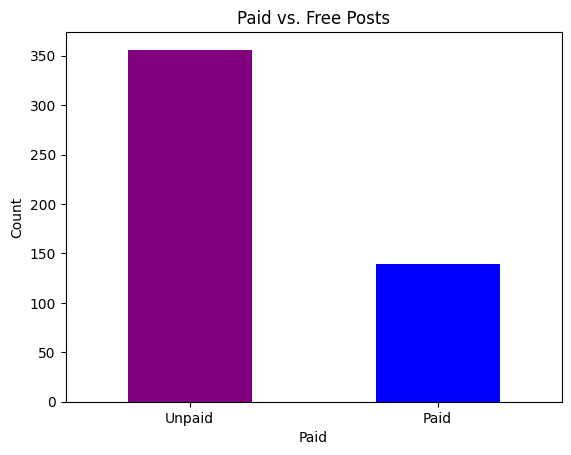

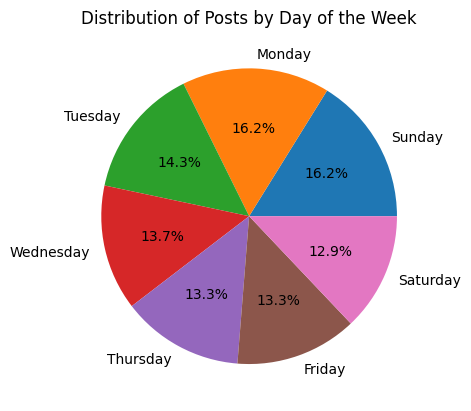

In [8]:
# Part Two -Question 1a)
#Creating a bar chart for the "Paid" variable
paid_counts = df['Paid'].value_counts()
paid_counts.index =['Unpaid', 'Paid']
paid_counts.plot(kind='bar', rot=0, color=['purple', 'blue'])
plt.title('Paid vs. Free Posts')
plt.xlabel('Paid')
plt.ylabel('Count')
plt.show()

##Creating  a pie chart for the "Weekday.Int" variable
weekday_counts = df['Weekday.Int'].value_counts()
weekday_counts.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Posts by Day of the Week')
plt.ylabel('')
plt.show()

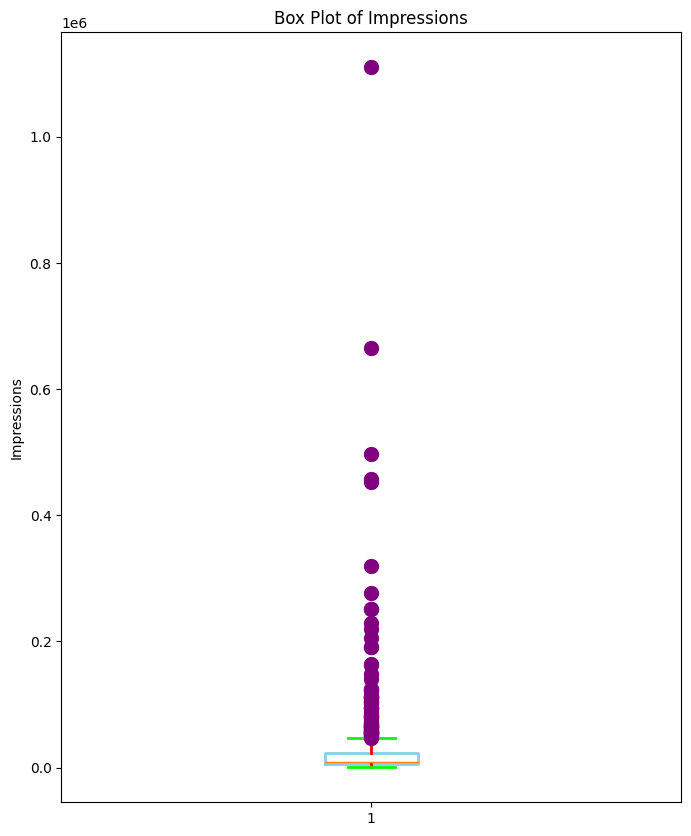

                   max    min     50%     25%      75%
Impressions  1110282.0  570.0  9084.0  5798.0  22503.0


In [16]:
# Part Two -Question 1b)
# Calculate the five-number summary of the "Impressions" variable
impressions_summary = df['Impressions'].describe()

# Select the specific statistics of interest (max, min, median, 25th and 75th percentiles)
specific_stats = impressions_summary[['max', 'min', '50%', '25%', '75%']]

# Create a larger and more visible vertical box plot for the "Impressions" variable
plt.figure(figsize=(8, 10))
boxprops = dict(linewidth=2, color='skyblue')
whiskerprops = dict(linewidth=2, color='red')
capprops = dict(linewidth=2, color='lime')
flierprops = dict(marker='o', markerfacecolor='purple', markersize=10, markeredgecolor='purple')
plt.boxplot(df['Impressions'], vert=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
plt.title('Box Plot of Impressions')
plt.ylabel('Impressions')
plt.show()

# Display statistics in a two-row table
summary_table = pd.DataFrame(specific_stats).transpose()
print(summary_table)


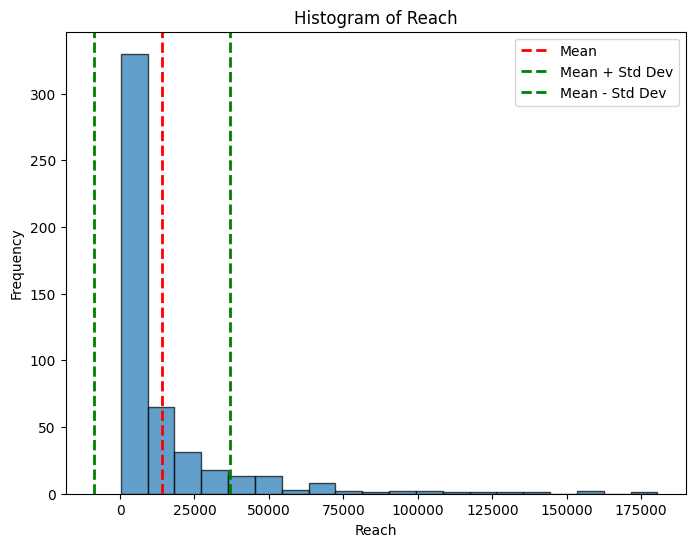

Mean of Reach: 14028.10101010101
Standard Deviation of Reach: 22821.050008085906


In [12]:
# Part Two -Question 1c)
# Calculate the mean and standard deviation of the "Reach" variable
reach_mean = df['Reach'].mean()
reach_std = df['Reach'].std()

# Create a histogram for the "Reach" variable
plt.figure(figsize=(8, 6))
plt.hist(df['Reach'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Reach')
plt.xlabel('Reach')
plt.ylabel('Frequency')
plt.axvline(reach_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(reach_mean + reach_std, color='g', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(reach_mean - reach_std, color='g', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
plt.legend()
plt.show()

# Display the mean and standard deviation
print("Mean of Reach:", reach_mean)
print("Standard Deviation of Reach:", reach_std)


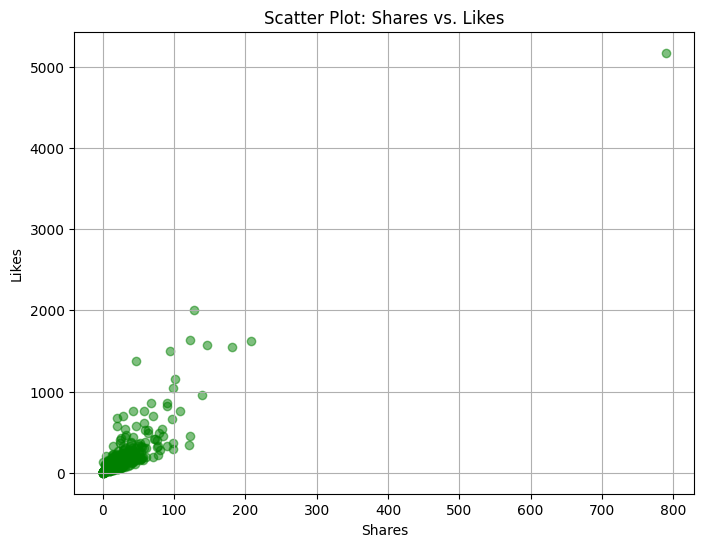

In [ ]:
# Part Two -Question 1d)
#Make scatter plot to visualize the relationship between Shares and Likes.
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Shares'], df['Likes'], alpha=0.5 ,c='Green')
plt.title('Scatter Plot: Shares vs. Likes')
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.grid(True)
plt.show()


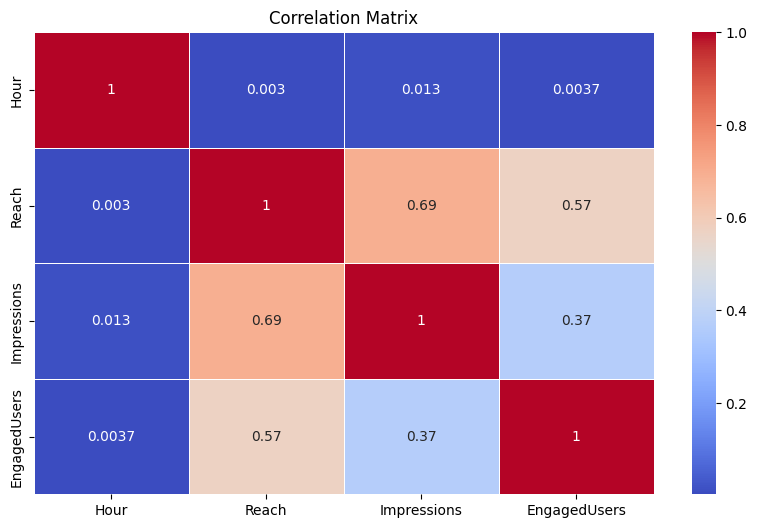

Correlation Matrix:
              Impressions  EngagedUsers     Reach
Impressions      1.000000      0.367281  0.694469
EngagedUsers     0.367281      1.000000  0.569135
Reach            0.694469      0.569135  1.000000


In [14]:
# Part Two -Question 2a) Study the correlations between Hours, Reach, Impression and EngagedUsers.

#Calculate the correlations
correlation_matrix = df[['Hour', 'Reach', 'Impressions', 'EngagedUsers']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation between Impression, EngagedUsers, and Reach
correlation_impression_engaged = df[['Impressions', 'EngagedUsers', 'Reach']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_impression_engaged)

In [10]:
# Part Two -Question 2b) Identify these predictors among Hours, Reach, Impression and EngagedUsers)
#which have significant impact on Shares

# Define the independent variables (predictors)
X = df[['Hour', 'Reach', 'Impressions', 'EngagedUsers']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Define the dependent variable
y = df['Shares']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
summary = model.summary()

# Extract p-values of the predictors
p_values = model.pvalues

# Print the summary and p-values
print("Regression Summary:")
print(summary)
print("\nP-Values of Predictors:")
print(p_values)

# Check the significance level (e.g., alpha = 0.05)
alpha = 0.05

# Identify predictors with significant impact on Shares
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < alpha]

print("\nPredictors with Significant Impact on Shares:")
for predictor in significant_predictors:
    print(predictor)

coefficients = model.params
print("\nCoefficients of Predictors:")
print(coefficients)


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Shares   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     58.11
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.90e-40
Time:                        12:22:09   Log-Likelihood:                -2463.6
No. Observations:                 495   AIC:                             4937.
Df Residuals:                     490   BIC:                             4958.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.7980     

In [ ]:
# Part Two -Question 2c)
# Define the independent variables (predictors) including a constant
X = sm.add_constant(df[['Hour', 'Reach', 'Impressions', 'EngagedUsers', 'Weekday.Int']])

# Define the dependent variable
y = df['Shares']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
summary = model.summary()

# Print the regression summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                 Shares   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     46.47
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.82e-39
Time:                        10:04:30   Log-Likelihood:                -2463.5
No. Observations:                 495   AIC:                             4939.
Df Residuals:                     489   BIC:                             4964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3657      4.785      2.375   

In [15]:
# Part Two -Question 3a)
# Split the data into paid and unpaid users
paid_users = df[df['Paid'] == 1]['Hour']
unpaid_users = df[df['Paid'] == 0]['Hour']

# Calculate the T-test
t_statistic, p_value = stats.ttest_ind(paid_users, unpaid_users)

# Calculate and print the 97% confidence interval for 'Hour' of paid users
confidence_interval_paid = stats.t.interval(0.97, loc=paid_users.mean(), scale=stats.sem(paid_users), df=len(paid_users)-1)

# Calculate and print the 97% confidence interval for 'Hour' of unpaid users
confidence_interval_unpaid = stats.t.interval(0.97, loc=unpaid_users.mean(), scale=stats.sem(unpaid_users), df=len(unpaid_users)-1)

# Print the T-test results
print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Print the 97% confidence intervals
print("\n97% Confidence Interval for Hour (Paid Users):")
print(confidence_interval_paid)

print("\n97% Confidence Interval for Hour (Unpaid Users):")
print(confidence_interval_unpaid)



T-Test Results:
T-Statistic: -1.5389039155176458
P-Value: 0.12446931389636405

97% Confidence Interval for Hour (Paid Users):
(6.556463590442494, 8.162960869989162)

97% Confidence Interval for Hour (Unpaid Users):
(7.525350032472059, 8.54206569786502)


In [13]:
## Part Two -Question 3b)
# Extract 'Comments' for each level of 'Weekday.Int'
comments_by_weekday = [df[df['Weekday.Int'] == level]['Comments'] for level in df['Weekday.Int'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*comments_by_weekday)

# Print ANOVA results
print("One-way ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

One-way ANOVA Results:
F-Statistic: 1.642227355201501
P-Value: 0.133551755344444


In [14]:
# Part Two -Question 3c)
# Group 'Shares' by 'Month.Int'
groups = [group['Shares'] for name, group in df.groupby('Month.Int')]

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*groups)

# Print the results
print("Kruskal-Wallis H-Test Results:")
print("H-Statistic:", h_statistic)
print("P-Value:", p_value)


Kruskal-Wallis H-Test Results:
H-Statistic: 68.4824344507671
P-Value: 2.3712720211586067e-10
